In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r'monthly-car-sales.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [38]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [39]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [40]:
df['Sales'].var()

20477560.959501565

<Axes: >

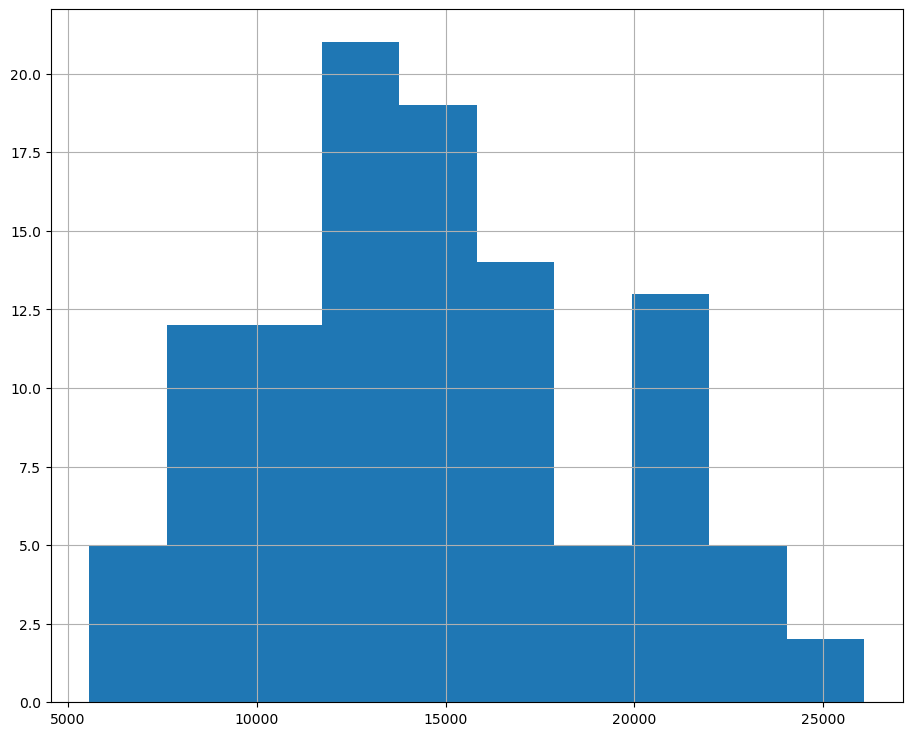

In [41]:
df['Sales'].hist()

In [42]:
df.duplicated().sum()

0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [44]:
df['Date'] = pd.to_datetime(df['Month'], format='%Y-%m')

print(df['Date'].dtype)  

df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m')

df = df.drop(columns='Month', axis=1)
df = df.drop(columns='FormattedDate', axis=1)
df.info() 

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Sales   108 non-null    int64         
 1   Date    108 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [45]:
df

,Sales,Date
0,6550,1960-01-01
1,8728,1960-02-01
2,12026,1960-03-01
3,14395,1960-04-01
4,14587,1960-05-01
...,...,...
103,16722,1968-08-01
104,14385,1968-09-01
105,21342,1968-10-01
106,17180,1968-11-01


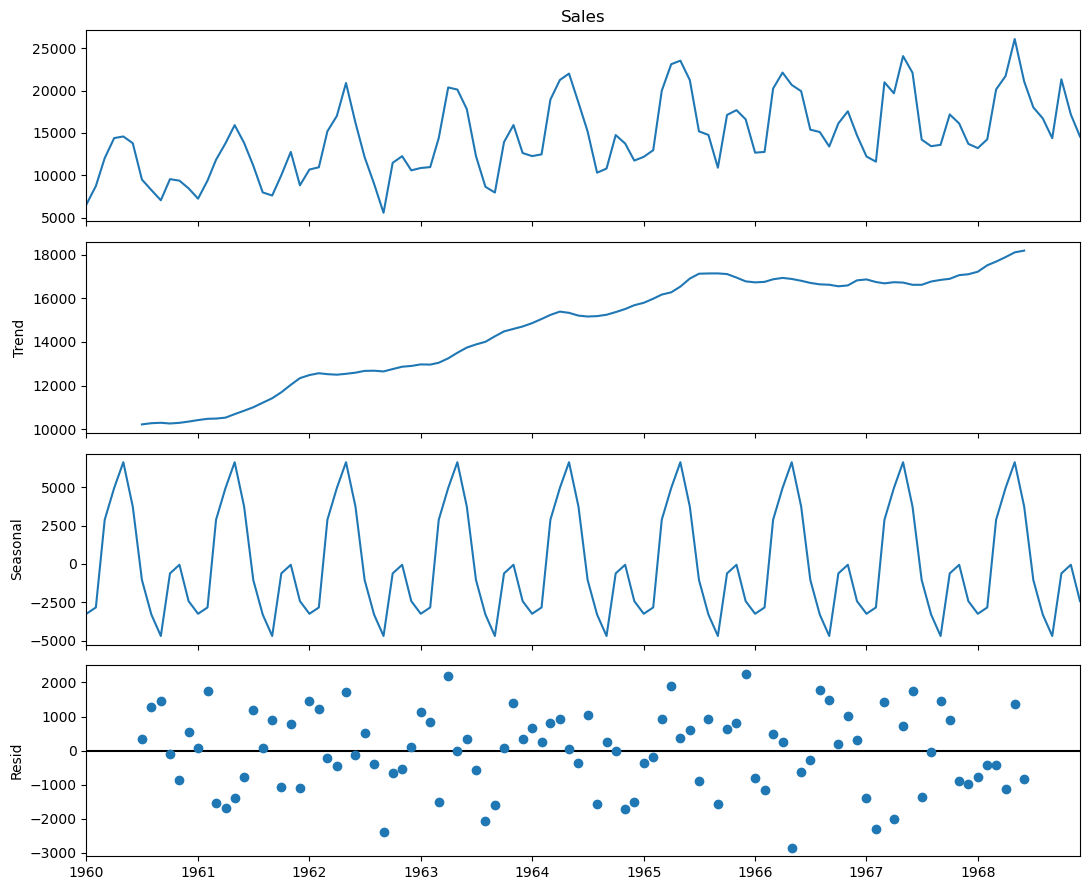

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
df.set_index('Date', inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(df['Sales'], model='additive') 
decompose.plot()

plt.show()

In [47]:
df

,Sales
Date,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


H0: The null hypothesis assumes that the process is unsteady;

H1: the alternative hypothesis suggests the opposite, respectively.

In [48]:
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(df['Sales'])
 

print('p-value = ' + str(adf_test[1]))

p-value = 0.6632691049832858


The range is unstable

In [51]:
df['Date_diff'] = df.Sales - df.Sales.shift(12)
df.dropna(subset=['Date_diff'], inplace=True)
df

,Sales,Date_diff
Date,,
1961-01-01,7237,687.0
1961-02-01,9374,646.0
1961-03-01,11837,-189.0
1961-04-01,13784,-611.0
1961-05-01,15926,1339.0
...,...,...
1968-08-01,16722,3288.0
1968-09-01,14385,787.0
1968-10-01,21342,4155.0


<Figure size 1200x600 with 0 Axes>

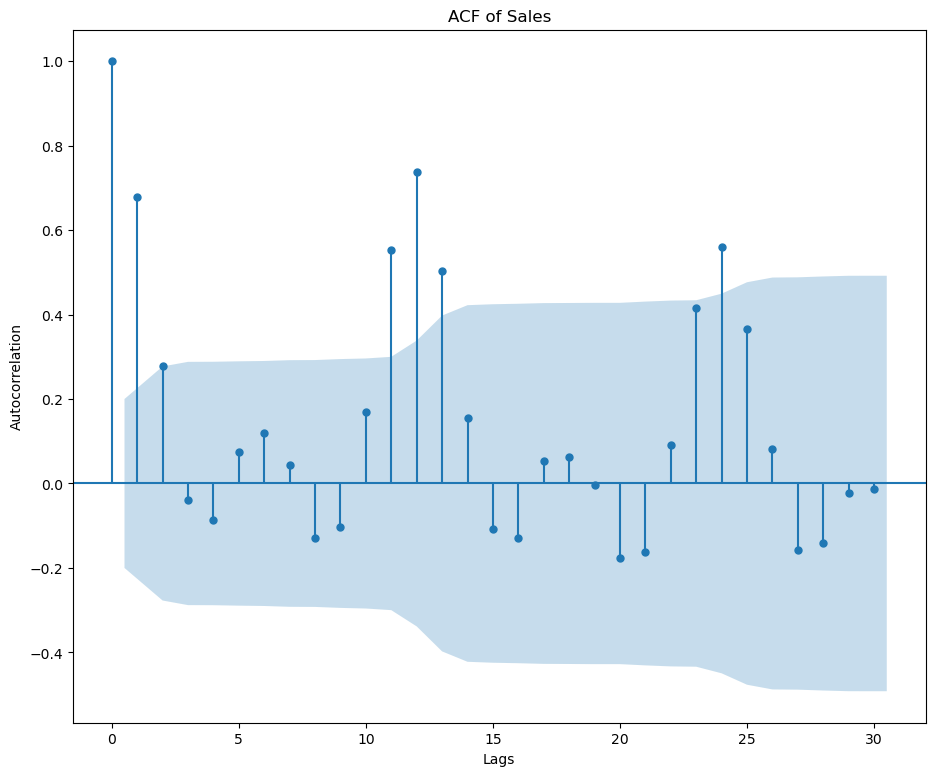

<Figure size 1200x600 with 0 Axes>

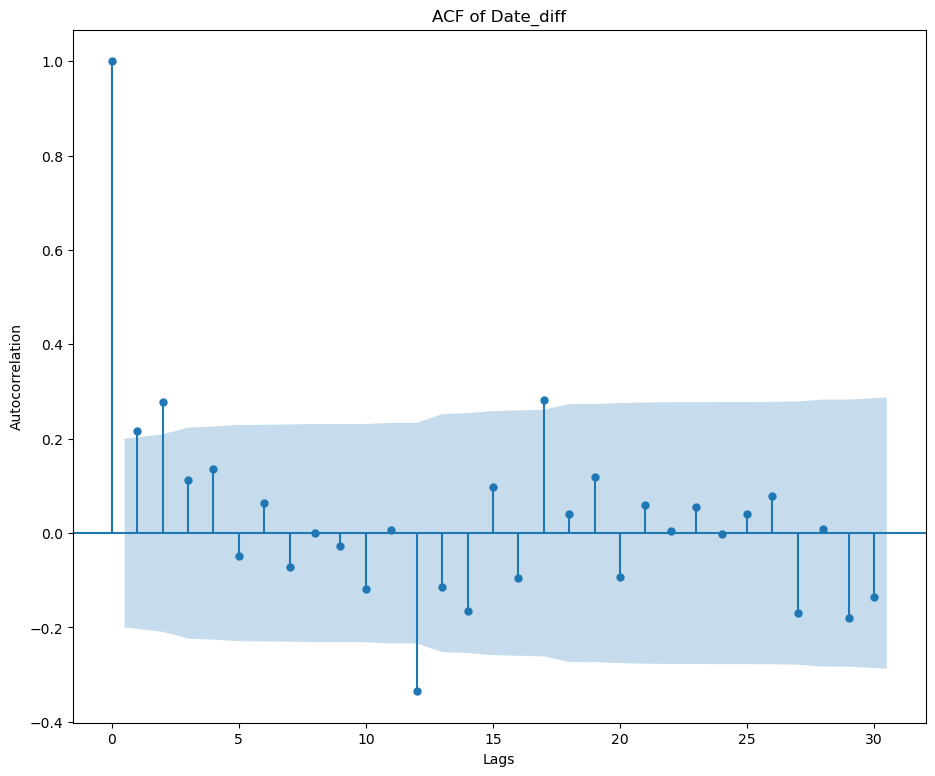

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Sales'], lags=30, alpha=0.05)
plt.title('ACF of Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.axis('tight')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(df['Date_diff'], lags=30, alpha=0.05)
plt.title('ACF of Date_diff')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.axis('tight')
plt.show()


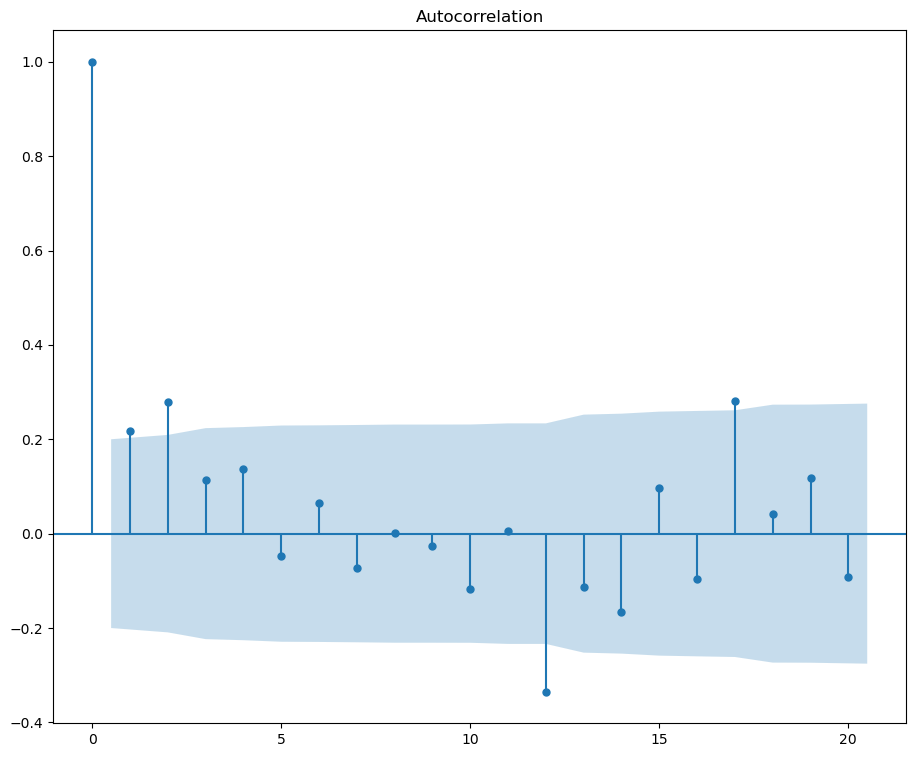

In [53]:
plot_acf(df['Date_diff'])
plt.axis('tight')
plt.show()

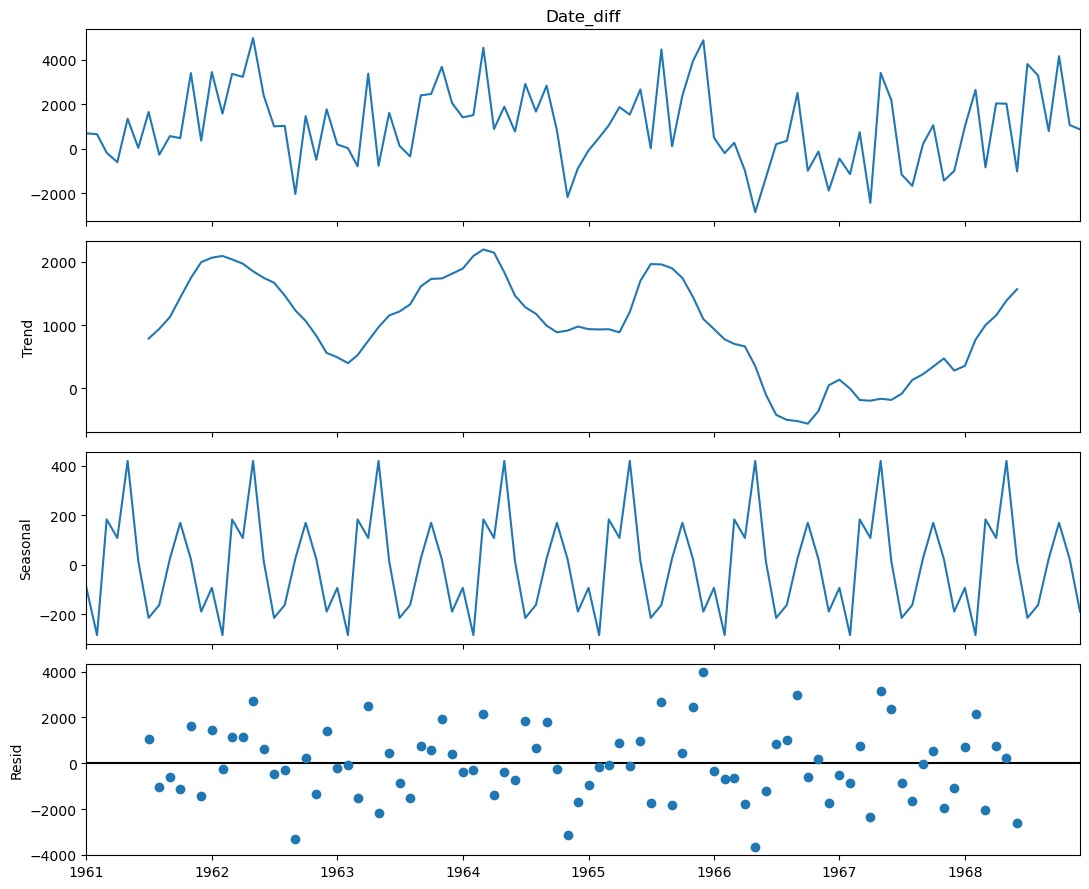

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(df['Date_diff'], model='additive')  
decompose.plot()

plt.show()

H0: The null hypothesis assumes that the process is unsteady;

H1: the alternative hypothesis suggests the opposite, respectively.

In [57]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(df['Date_diff'])
 
print('p-value = ' + str(adf_test[1]))

p-value = 0.004966833586579756


The row has become stationary

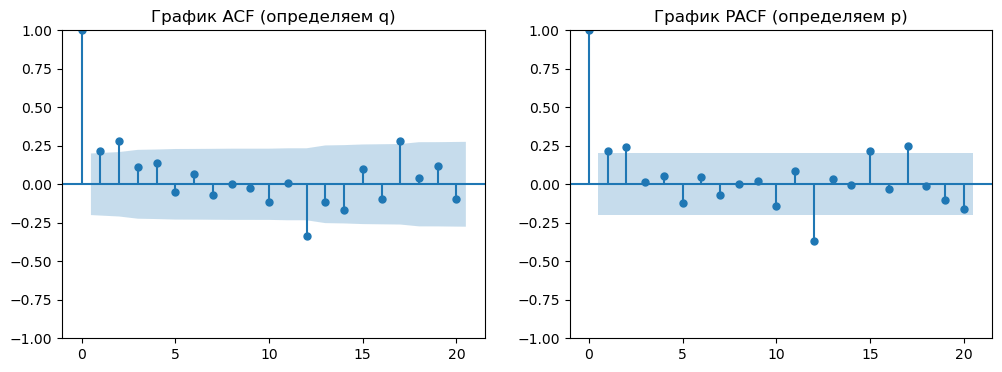

In [68]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(df['Date_diff'].dropna(), lags=20, ax=ax[0])
ax[0].set_title("График ACF (определяем q)")

sm.graphics.tsa.plot_pacf(df['Date_diff'].dropna(), lags=20, ax=ax[1])
ax[1].set_title("График PACF (определяем p)")

plt.show()

C:\Users\rigan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rigan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rigan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Date_diff   No. Observations:                   76
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -669.630
Date:                Tue, 11 Mar 2025   AIC                           1347.261
Time:                        16:53:12   BIC                           1356.584
Sample:                    01-01-1961   HQIC                          1350.987
                         - 04-01-1967                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        989.4603    434.292      2.278      0.023     138.263    1840.658
ar.L1          0.7389      0.215      3.436      0.001       0.317       1.160
ma.L1         -0.4617      0.270     -1.707      0.0

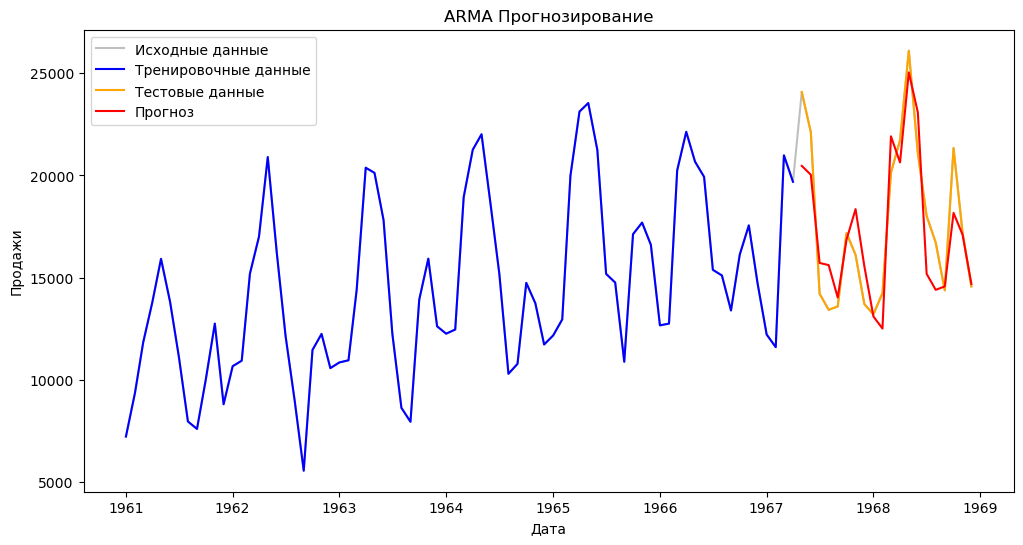

Прогноз на тестовые данные (в исходном масштабе):
1967-05-01    20469.400943
1967-06-01    20037.976372
1967-07-01    15723.932290
1967-08-01    15619.581135
1967-09-01    14033.670254
1967-10-01    16860.835058
1967-11-01    18356.672723
1967-12-01    15565.535537
1968-01-01    13108.117084
1968-02-01    12518.885359
1968-03-01    21916.402798
1968-04-01    20638.562736
1968-05-01    25038.764120
1968-06-01    23080.040606
1968-07-01    15192.155940
1968-08-01    14410.674442
1968-09-01    14578.013075
1968-10-01    18169.479926
1968-11-01    17103.302635
1968-12-01    14698.649399
Freq: MS, dtype: float64


In [73]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Предположим, что df уже загружен и содержит колонки 'Sales' и 'Date_diff'

# Разделение данных на тренировочную и тестовую выборки
train, test = train_test_split(df['Date_diff'], test_size=0.2, shuffle=False)

# Подгонка модели ARMA (или ARIMA)
model = ARIMA(train, order=(1, 0, 1))  # p=1, d=0 (разность), q=1
model_fit = model.fit()

# Вывод результатов модели
print(model_fit.summary())

# Прогнозирование
forecast = model_fit.forecast(steps=len(test))

# Восстановление исходных значений продаж
forecast_original = forecast + df['Sales'].shift(12).loc[test.index]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Исходные данные', color='gray', alpha=0.5)
plt.plot(train.index, df['Sales'].loc[train.index], label='Тренировочные данные', color='blue')
plt.plot(test.index, df['Sales'].loc[test.index], label='Тестовые данные', color='orange')
plt.plot(forecast.index, forecast_original, label='Прогноз', color='red')
plt.title('ARMA Прогнозирование')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

# Вывод прогноза
print('Forecast for the test data (in the initial scale):')
print(forecast_original)

In [75]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Восстанавливаем продажи из предсказанных разностей
forecast_sales = df['Sales'].shift(12).loc[test.index] + forecast

# Убираем NaN после сдвига
valid_idx = ~forecast_sales.isna()
forecast_sales = forecast_sales[valid_idx]
test_sales = df['Sales'].loc[test.index][valid_idx]

# Вычисляем метрики точности
mae = mean_absolute_error(test_sales, forecast_sales)
mse = mean_squared_error(test_sales, forecast_sales)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_sales - forecast_sales) / test_sales)) * 100

# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 1534.52
MSE: 3453506.49
RMSE: 1858.36
MAPE: 8.55%
